In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
import random

import warnings
warnings.filterwarnings("ignore")

(600, 600, 3)


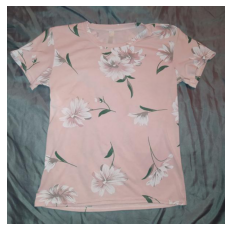

In [2]:
path_to_jpg_file = "/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16f1fbdf-d339-40f6-aecb-e55199db7a96.jpg"
img = mpimg.imread(path_to_jpg_file)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
pixels = img.reshape((-1,3))

print(pixels.shape)

(360000, 3)


In [4]:
pixels[0]

array([56, 50, 52], dtype=uint8)

### Clustering for Birch

In [5]:
bclust=Birch(n_clusters=None, branching_factor=200, threshold = 1).fit(pixels)
print(bclust)

Birch(branching_factor=200, n_clusters=None, threshold=1)


In [6]:
pred = bclust.predict(pixels)

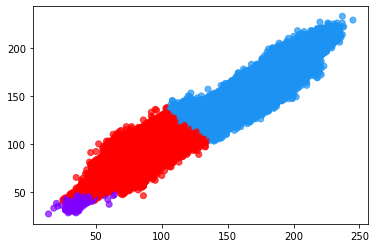

In [7]:
plt.scatter(pixels[:, 0], pixels[:, 1], c = pred,cmap = 'rainbow', alpha = 0.7)

In [8]:
# a list of within-cluster sum of squares (WCSS) for each clustering solution
wcss =[]
k_range = range(2, 21)
for k in k_range:
    print(f'Processing k={k}')
    bclust = Birch(k)
    bclust.fit(pixels)
    wcss.append(bclust)
    
wcss

Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20


[Birch(threshold=2),
 Birch(threshold=3),
 Birch(threshold=4),
 Birch(threshold=5),
 Birch(threshold=6),
 Birch(threshold=7),
 Birch(threshold=8),
 Birch(threshold=9),
 Birch(threshold=10),
 Birch(threshold=11),
 Birch(threshold=12),
 Birch(threshold=13),
 Birch(threshold=14),
 Birch(threshold=15),
 Birch(threshold=16),
 Birch(threshold=17),
 Birch(threshold=18),
 Birch(threshold=19),
 Birch(threshold=20)]

In [9]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [10]:
print(f'calinski_harabasz_score: {metrics.calinski_harabasz_score(pixels, pred)}')

calinski_harabasz_score: 1075558.2780287007


In [11]:
print(f'davies_bouldin_score: {davies_bouldin_score(pixels, pred)}')

davies_bouldin_score: 0.3210813494312344


In [12]:
results3 = {}
for i in range(2,10):
    brc = Birch(n_clusters=i) 
    labels3 = brc.fit_predict(pixels)
    sc_index = silhouette_score(pixels, labels3)
    results3.update({i: sc_index})

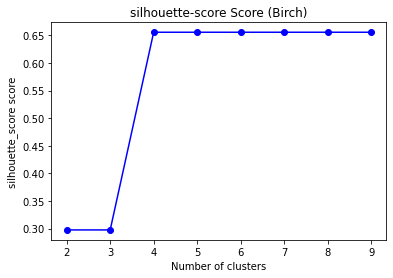

In [14]:
plt.plot(list(results3.keys()), list(results3.values()),'-bo')
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score score")
plt.title('silhouette-score Score (Birch)')
plt.show()

In [13]:
print(f'Silhouette Score(n=5): {silhouette_score(pixels, pred)}')

Silhouette Score(n=5): 0.6720703457488516
